In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
from datetime import timedelta, datetime
import plotly.graph_objs as go
import plotly.express as ex
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
from scipy.stats import pearsonr

C:\Users\ACER\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
GDP_data = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_1429392.csv', skiprows = 4)
GDP_data = GDP_data.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 65'], axis = 1)
missing = GDP_data.isna().sum(axis = 1).mean()
print("Missing value raio: {:.2f}/{:d} = {:.2f}%".format(missing, 2020 - 1960, 100*missing/(2020 - 1960)))
#raw_data.isna().sum().head(50)

Missing value raio: 14.15/60 = 23.58%


In [3]:
GDP_data_2 = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_1495053.csv', skiprows = 4)
GDP_data_2 = GDP_data_2.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 65'], axis = 1)
missing = GDP_data.isna().sum(axis = 1).mean()
print("Missing value raio: {:.2f}/{:d} = {:.2f}%".format(missing, 2020 - 1960, 100*missing/(2020 - 1960)))

Missing value raio: 14.15/60 = 23.58%


In [4]:
CO2_data = pd.read_csv('API_EN.ATM.GHGT.KT.CE_DS2_en_csv_v2_1429804.csv', skiprows = 4)
CO2_data = CO2_data.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 65'], axis = 1)
missing = CO2_data.isna().sum(axis = 1).mean()
print("Missing value raio: {:.2f}/{:d} = {:.2f}%".format(missing, 2020 - 1960, 100*missing/(2020 - 1960)))
#raw_data.isna().sum().head(50)

Missing value raio: 22.97/60 = 38.29%


In [5]:
CO2_data_2 = pd.read_csv('annual-co-emissions-by-region.csv')
CO2_data_2 = CO2_data_2[CO2_data_2['Year'] >= 1960]
CO2_data_2.reset_index(drop = True, inplace = True)
df = pd.DataFrame(columns = GDP_data.columns)
#df

In [6]:
CO2_data_2[CO2_data_2['Entity'] == "North America"]

,Entity,Code,Year,Annual CO2 emissions
9146,North America,NaN,1960,3179.805610
9147,North America,NaN,1961,3175.034687
9148,North America,NaN,1962,3299.671365
9149,North America,NaN,1963,3431.660214
9150,North America,NaN,1964,3609.686660
9151,North America,NaN,1965,3760.302407
9152,North America,NaN,1966,3944.265236
9153,North America,NaN,1967,4115.021506
9154,North America,NaN,1968,4276.993701
9155,North America,NaN,1969,4488.300807


In [7]:
df = pd.DataFrame(columns = GDP_data.columns)
df['Country Name'] = GDP_data['Country Name']
df['Country Code'] = GDP_data['Country Code']
for i in range(CO2_data_2.index.size):
    row = CO2_data_2.loc[i]
    #df[df['Country Name'] == row['Entity']][str(row['Year'])] = row['Annual CO2 emissions']
    df.loc[df['Country Name'] == row['Entity'], str(row['Year'])] = row['Annual CO2 emissions']
df[df['Country Name'] == 'North America']

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
168,North America,NAC,3179.81,3175.03,3299.67,3431.66,3609.69,3760.3,3944.27,4115.02,...,6805.62,6613.5,6767.7,6808.88,6662.18,6535.3,6513.05,6645.03,NaN,NaN


In [8]:
df['tmp'] = 0
df.fillna(df.median(), inplace = True)
df.drop('tmp', axis = 'columns', inplace = True)
GDP_data_2.fillna(GDP_data_2.median(), inplace = True)
GDP_data.fillna(GDP_data_2.median(), inplace = True)
df

C:\Users\ACER\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning:

Mean of empty slice



,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,0.618561,0.645553,0.708942,0.679088,0.660275,0.592387,0.553944,0.682359,...,2.498848,1.348352,0.861040,0.872032,0.897680,0.883024,0.890740,0.897147,NaN,NaN
1,Afghanistan,AFG,0.413885,0.490798,0.688594,0.706736,0.838551,1.006917,1.091159,1.281865,...,12.226017,10.742057,9.036782,8.449878,9.019514,8.653351,8.971072,9.438789,NaN,NaN
2,Angola,AGO,0.548951,0.453707,1.179127,1.149723,1.222914,1.186155,1.552466,0.991815,...,30.329702,33.800564,33.228501,44.248865,33.979025,34.110948,34.111985,34.537201,NaN,NaN
3,Albania,ALB,2.022528,2.279008,2.462208,2.081152,2.015200,2.172752,2.550144,2.678384,...,5.235856,4.920752,4.909760,5.485008,4.612976,4.532368,4.651350,4.569964,NaN,NaN
4,Andorra,AND,1.952466,2.279008,2.116990,2.012640,2.206832,2.367200,2.588616,2.931612,...,0.490976,0.487312,0.476320,0.461664,0.465328,0.468992,0.482251,0.470909,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,1.952466,2.279008,2.116990,2.012640,2.206832,2.367200,2.588616,2.931612,...,8.361248,7.936224,8.068128,7.254720,8.401552,8.936496,8.929470,8.886763,NaN,NaN
260,"Yemen, Rep.",YEM,1.952466,2.279008,2.116990,2.012640,2.206832,2.367200,2.588616,2.931612,...,9.390832,8.966657,9.912026,9.825225,10.876993,10.462961,11.312453,11.710903,NaN,NaN
261,South Africa,ZAF,97.843513,102.119846,105.669994,109.725151,119.546018,128.140038,128.234886,133.760109,...,475.813928,462.948989,457.441464,482.764094,462.299992,474.981096,462.812494,467.562132,NaN,NaN
262,Zambia,ZMB,4.355258,3.708972,3.582691,3.444491,3.274992,3.912261,3.498229,4.787631,...,2.781519,3.489096,3.756145,4.255726,4.295821,4.837847,5.121556,5.228035,NaN,NaN


In [9]:
# 1960 - 2018
def corr_by_country(name):
    x = GDP_data_2[GDP_data_2['Country Name'] == name].drop(['Country Name', 'Country Code'], axis = 1).values.flatten()[:-2]
    y = df[df['Country Name'] == name].drop(['Country Name', 'Country Code'], axis = 1).values.flatten()[:-2]
    corr, _ = pearsonr(x, y)
    return x, y, corr

def corr_by_country_PC(name):
    x = GDP_data[GDP_data['Country Name'] == name].drop(['Country Name', 'Country Code'], axis = 1).values.flatten()[:-2]
    y = df[df['Country Name'] == name].drop(['Country Name', 'Country Code'], axis = 1).values.flatten()[:-2]
    corr, _ = pearsonr(x, y)
    return x, y, corr

0.9285884544378337

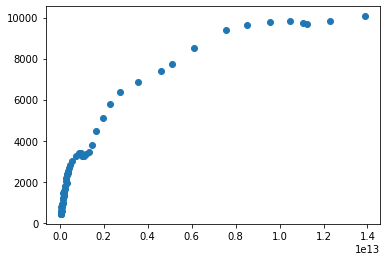

In [10]:
x, y, corr = corr_by_country('China')
plt.scatter(x, y)
corr

0.9330043688166019

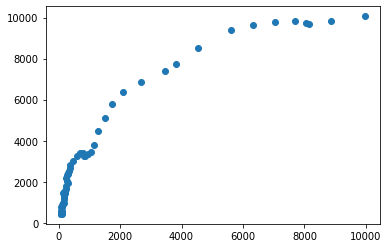

In [11]:
x, y, corr = corr_by_country_PC('China')
plt.scatter(x, y)
corr

In [12]:
mean_corr = 0
mean_corr_2 = 0
corr_list = []
corr_PC_list = []
for index, row in df.iterrows():
    _, _, corr = corr_by_country(row['Country Name'])
    corr_list.append(corr)
    mean_corr += corr / len(df)
    
    _, _, corr = corr_by_country_PC(row['Country Name'])
    corr_PC_list.append(corr)
    mean_corr_2 += corr / len(df)
print("Mean corr = ", mean_corr)
print("Mean corr PC = ", mean_corr_2)

Mean corr =  0.5648458958352159
Mean corr PC =  0.32581013191353675


In [13]:
df1 = df.drop(['2019', '2020'], axis = 'columns')
df1['Corr'] = corr_list
df1['Corr PC'] = corr_PC_list
df1 = df1.sort_values(by=['2018'], ascending = False)
df1.head(15)
df1

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,Corr,Corr PC
257,World,WLD,9410.529753,9452.107735,9838.202053,10379.067960,10969.325140,11466.150220,12045.555870,12431.009380,...,34357.365920,34919.288710,35207.885980,35505.827040,35462.746740,35675.099440,36153.261650,36572.754220,0.968426,0.981819
38,China,CHN,778.979466,550.958537,439.342105,435.517639,435.703767,474.680625,521.458881,432.223557,...,9388.199234,9633.899303,9796.527160,9820.360492,9716.467840,9704.479432,9838.754028,10064.685698,0.928588,0.933004
168,North America,NAC,3179.805610,3175.034687,3299.671365,3431.660214,3609.686660,3760.302407,3944.265236,4115.021506,...,6805.617861,6613.496846,6767.698054,6808.881940,6662.182555,6535.304885,6513.048577,6645.028493,0.812801,0.850652
249,United States,USA,2887.820432,2877.369848,2984.001744,3116.022372,3252.755162,3388.192678,3559.179160,3693.298171,...,5572.584775,5371.777170,5522.908365,5572.106312,5422.965677,5306.662457,5270.748525,5416.277883,0.764550,0.805148
107,India,IND,120.576041,130.392929,143.451840,154.068161,150.638994,165.961366,171.688393,172.093127,...,1811.961392,1979.046909,1994.100994,2199.400041,2298.170090,2371.752346,2456.954485,2654.101042,0.972368,0.975817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Tonga,TON,0.010992,0.010992,0.010992,0.010992,0.010992,0.010992,0.010992,0.014656,...,0.102592,0.106256,0.113584,0.113584,0.120912,0.128240,0.131655,0.135287,-0.593071,-0.636921
217,Sao Tome and Principe,STP,0.010992,0.010992,0.010992,0.007328,0.010992,0.010992,0.010992,0.010992,...,0.102592,0.113584,0.113584,0.113584,0.113584,0.120912,0.120691,0.123728,-0.387083,-0.399740
122,Kiribati,KIR,1.952466,0.007328,0.010992,0.018320,0.018320,0.010992,0.010992,0.021984,...,0.054960,0.051296,0.051296,0.058624,0.062288,0.065952,0.067708,0.069576,0.198099,0.197720
177,Nauru,NRU,1.952466,2.279008,2.116990,2.012640,0.029312,0.032976,0.032976,0.047632,...,0.040304,0.040304,0.043968,0.047632,0.047632,0.047632,0.048901,0.050249,-0.228027,-0.226964


In [14]:
df2 = pd.DataFrame()
df2['Country Name'] = df1['Country Name']
df2['CO2 2018'] = df1['2018']
df2['GDP_Corr'] = df1['Corr']
df2['GDP_PC_Corr'] = df1['Corr PC']
df2.head(30)

,Country Name,CO2 2018,GDP_Corr,GDP_PC_Corr
257,World,36572.754220,0.968426,0.981819
38,China,10064.685698,0.928588,0.933004
168,North America,6645.028493,0.812801,0.850652
249,United States,5416.277883,0.764550,0.805148
107,India,2654.101042,0.972368,0.975817
117,Japan,1161.981125,0.871705,0.875774
53,Germany,759.001946,-0.700131,-0.023655
203,Saudi Arabia,621.302074,0.944283,-0.492357
104,Indonesia,614.916407,0.922694,-0.393246
33,Canada,568.412218,0.824698,0.855600


In [15]:
fig = go.Figure( layout=go.Layout(xaxis=dict(title = "Year", color = 'black'),
    ))

fig.add_trace(go.Scatter(
                x=df1.transpose()[38][2:-2].index,
                y=df1.transpose()[38][2:-2],
                name="CO2",
                line_width = 1.5,
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=GDP_data.transpose()[38][2:-2].index,
                y=GDP_data.transpose()[38][2:-2],
                name="GDP pc",
                line_width = 1.5,
                opacity=0.8))



# Use date string to set xaxis range
fig.update_layout(title_text = "China GDP per capita vs CO2 emissions", title_x=0.5, title_font_size = 22,
                  paper_bgcolor = 'rgb(245, 246, 250)', plot_bgcolor = 'rgb(245, 246, 250)')
fig.show()